Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 1152x576 with 0 Axes>

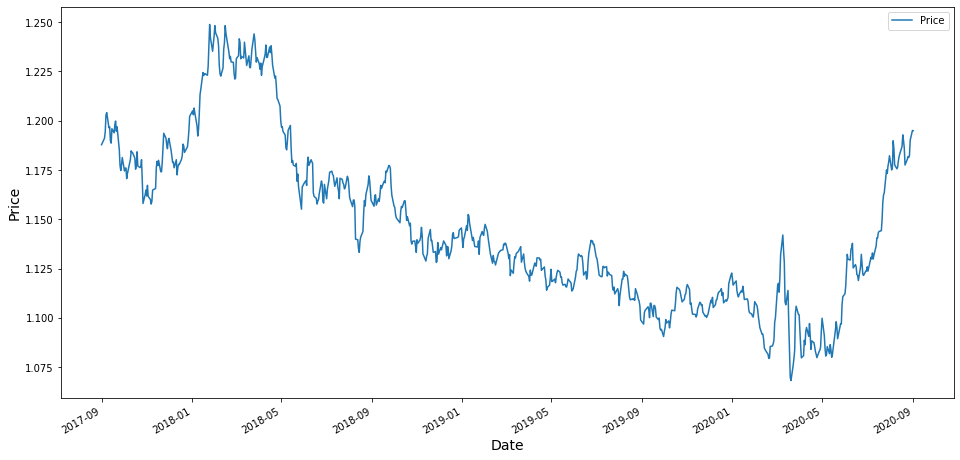

599 150
(598, 1, 1) (598,)


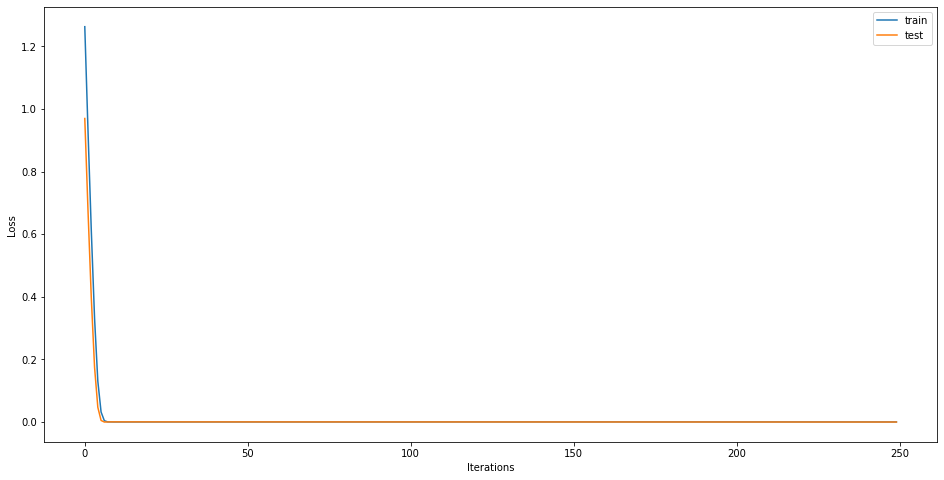

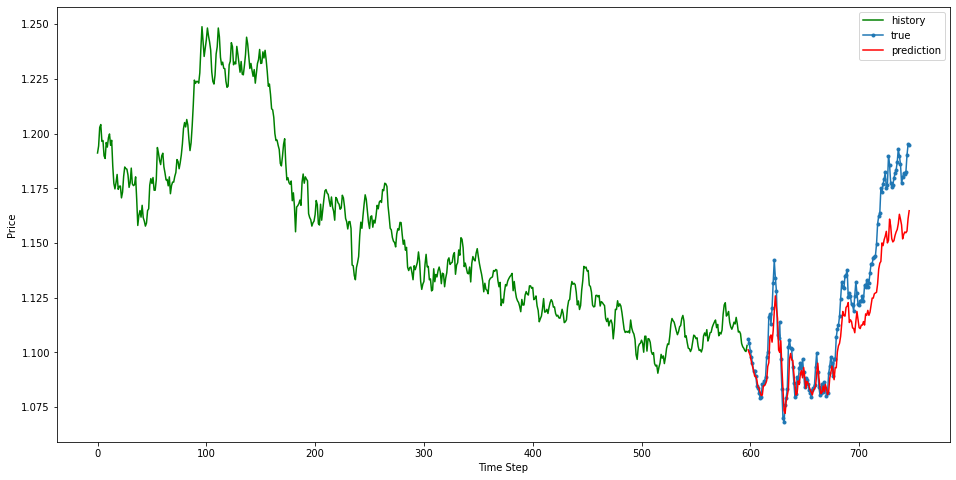

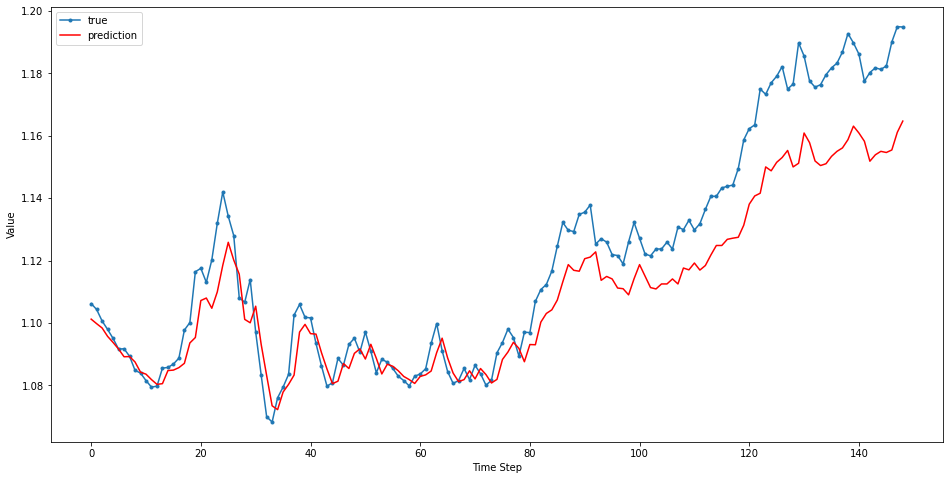

In [ ]:
# Program_19d.ipynb: Using LSTM to predict financial time series. 
# of the US Dollar and Euro exchange rates.
# Importing the relevant libraries and API.
import pandas as pd
pd.options.display.max_colwidth = 60
!pip install fredapi
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import mean
from fredapi import Fred              # Import the FRED API
import numpy as np
import math
import statistics
import pylab
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(16, 8)
fred = Fred(api_key='419401c4103800a51c50e6113b1f7500')
# Retrieve historical data for the US/EUR exchange rate series between Sept 2017 and Sept 2020.
data = fred.get_series('DEXUSEU',observation_start='2017-09-01', observation_end='2020-09-01',name='Price')
data.head()
#Converting the data series into a dataframe (so we can replace missing values easily).
Input = data.to_frame()
Input = Input.dropna()
plt.figure(1)
# Cleaning the input by replacing missing values with the previous value.
clean_input= Input.fillna(method='ffill')
DATA = clean_input
# Renaming the price column from '0' to 'Price.
DATA.rename( columns={0 :'Price'}, inplace=True )
DATA.to_csv("EU_Dollar_Data.csv")
# Plotting the data.
DATA.plot()
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

# We'll split training and test data as 80-20, respectively.
# Getting the number of rows to train the model on. 
train_size= int(len(DATA)*0.8)
test_size= len(DATA) - train_size
# Splitting train and test data then printing the size (rows) of each.
train, test = DATA.iloc[0:train_size], DATA.iloc[train_size:len(DATA)]
print(len(train),len(test))
# Function:create_dataset.
# Converts data into numpy arrays.
def create_dataset(X,y,time_steps=1):
    Xs, ys= [],[]
    for i in range(len(X)-time_steps):
        v= X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
time_steps = 1
# Split data into X_train and y_train datasets.
# (train.Price and test.Price extracts the data from the train and test dataframe).
X_train, y_train = create_dataset(train, train.Price, time_steps)
# Splitting test data into X_test and y_test datasets.
X_test, y_test = create_dataset(test, test.Price, time_steps)
print(X_train.shape, y_train.shape)
# Defining the LSTM network architecture.
model=keras.Sequential( )
model.add(keras.layers.LSTM(128,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dense(1))
# Compile the model.
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.0005))
# Train the model (we use 250 epochs).
history= model.fit(X_train, y_train, epochs=250, batch_size = 16,
                  validation_split = 0.2 , verbose = 0, shuffle = False)
plt.figure(2)
plt.plot(history.history['loss'], label= 'train')
plt.plot(history.history['val_loss'], label= 'test')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(3)
# Get the models predicted price values.
y_pred=model.predict(X_test)

# Plot the predictions along with the true outcomes
plt.plot(np.arange(0,len(y_train)), y_train, 'g',label="history")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test, marker='.',label="true")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred,  'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show()
# Zoom-in on predicted values.
plt.figure(4)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
# Get the models predicted price values.
y_pred=model.predict(X_test)

# Plot the predictions along with the true outcomes
plt.plot(np.arange(0,len(y_train)), y_train, 'g',label="history")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test, marker='.',label="true")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred,  'r', label="prediction")

plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show()

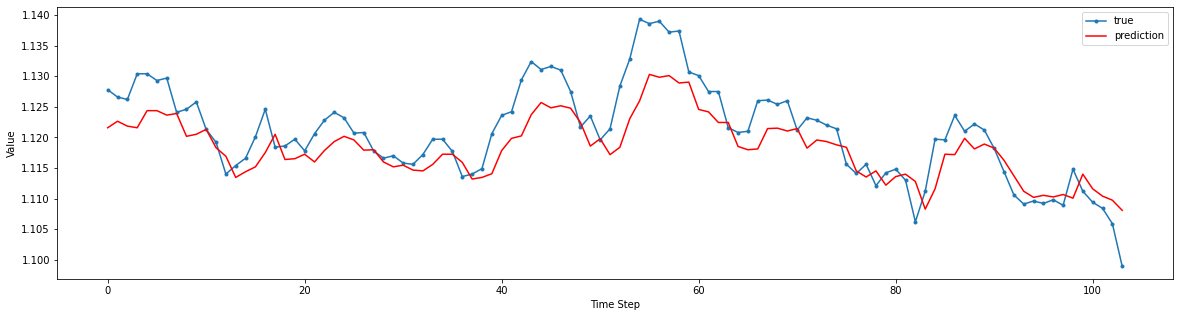

In [ ]:
plt.figure(4)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [ ]:
print(Input)

                 0
2018-09-03     NaN
2018-09-04  1.1566
2018-09-05  1.1620
2018-09-06  1.1624
2018-09-07  1.1572
...            ...
2020-08-26  1.1813
2020-08-27  1.1824
2020-08-28  1.1901
2020-08-31  1.1950
2020-09-01  1.1949

[522 rows x 1 columns]
